# **Project 1: McDonald's Nutrition vs. Grocery Foods**
### Author: Owen Brock
### Date: 1/29/2025

## Introduction: The Problem & Research Questions

Fast food is a convenient option, but it often comes with **high calories, fats, and sodium**. Many people believe they are making healthy choices at McDonald's, but **how does McDonald's nutrition compare to common grocery foods?**

### **Key Research Questions**
1. How do McDonald's menu items compare nutritionally to common grocery store foods?
2. Which McDonald's menu categories (e.g., Burgers, Salads, Desserts) contain the most calories, fat, and sugar?
3. Are McDonald's "healthier" options truly healthy compared to home-cooked meals?
4. Can data visualizations help people make **smarter eating choices**?

**Goal:** This project aims to compare **McDonald's menu nutrition with everyday grocery store foods** to help consumers make **informed dietary choices**.



## **The Data**
 **McDonald's Dataset:** Scraped from McDonald's website.  
 **Common Foods Dataset:** A dataset containing over 300 grocery food items with nutritional information.

**Dataset Features:**
- `Item` → Food name  
- `Category` → Food type (e.g., Burger, Salad, Fruit, Meat)  
- `Calories`, `Protein`, `Fat`, `Carbs`, `Sodium` → Key nutritional elements  


## **Importing Libraries**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load McDonald's dataset
mcdonalds_data = pd.read_csv("C:/Users/owenb/OneDrive/Documents/DataMining/menu.csv")

In [7]:
# load Common Foods dataset
common_foods_data = pd.read_csv("C:/Users/owenb/OneDrive/Documents/DataMining/nutrients_csvfile.csv")


In [8]:
# first few rows
print("McDonald's Data:")
display(mcdonalds_data.head())
print("\nCommon Foods Data:")
display(common_foods_data.head())

McDonald's Data:


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10



Common Foods Data:


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


## Data Preprocessing

Before analyzing the data, we need to clean it by:
- **Handling missing values**
- **Converting numerical columns**
- **Removing unnecessary columns**

In [10]:
# checking missing values
print("Missing Values in McDonald's Data:")
print(mcdonalds_data.isnull().sum())
print("\nMissing Values in Common Foods Data:")
print(common_foods_data.isnull().sum())

# dropping missing values
mcdonalds_data = mcdonalds_data.dropna()
common_foods_data = common_foods_data.dropna()

Missing Values in McDonald's Data:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Missing Values in Common Foods Data:
Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat 

In [11]:
# cleaning numbers that contain commas by removing them 
mcdonalds_data.replace(',', '', regex=True, inplace=True)
common_foods_data.replace(',', '', regex=True, inplace=True)


In [13]:
#replacing t(trace amounts) with 0(rounding down)
common_foods_data = common_foods_data.replace("t", 0)

### When converting to float I got an error from the common foods that included one "large artichoke" being 8-44 calories so I will average this

In [16]:
def fix_range_values(value):
    if pd.isna(value) or value == '':  # handle empty strings
        return None
    if "-" in str(value):  # handle ranges ("8-44")
        numbers = value.split("-")
        try:
            return (float(numbers[0]) + float(numbers[1])) / 2  # calc the average
        except ValueError:
            return None  # return None if the range cannot be processed
    try:
        return float(value)  # convert to float if it's a single number
    except ValueError:
        return None  # return None if the value cannot be converted to float

#defining the common foods
common_foods_columns = ["Calories", "Fat", "Sat.Fat", "Carbs", "Protein"]
# applying the function I just created
for col in common_foods_columns:
    common_foods_data[col] = common_foods_data[col].apply(fix_range_values)
    
common_foods_data[common_foods_columns] = common_foods_data[common_foods_columns].map(fix_range_values)



In [70]:
# Now I convert McDonald's dataset columns to float
num_columns = ["Calories", "Total Fat", "Sodium", "Saturated Fat", "Sugars", "Protein", "Carbohydrates"]
mcdonalds_data[num_columns] = mcdonalds_data[num_columns].astype(float)

# Convert Common Foods dataset columns to float(Defined above)
common_foods_data[common_foods_columns] = common_foods_data[common_foods_columns].astype(float)



## Data Visualization & Analysis  
Now, let's explore key insights:
- **Which McDonald's items have the highest/lowest calories?**
- **How do fast food items compare to common grocery foods?**
- **Which menu categories are the most/least nutritious?**

In [21]:
# 10 highest calorie items
top_10_high_calories = mcdonalds_data.nlargest(10, "Calories")[["Item", "Category", "Calories"]]
print("Top 10 High-Calorie McDonald's Items:")
display(top_10_high_calories)

Top 10 High-Calorie McDonald's Items:


,Item,Category,Calories
82,Chicken McNuggets (40 piece),Chicken & Fish,1880.0
32,Big Breakfast with Hotcakes (Large Biscuit),Breakfast,1150.0
31,Big Breakfast with Hotcakes (Regular Biscuit),Breakfast,1090.0
34,Big Breakfast with Hotcakes and Egg Whites (La...,Breakfast,1050.0
33,Big Breakfast with Hotcakes and Egg Whites (Re...,Breakfast,990.0
81,Chicken McNuggets (20 piece),Chicken & Fish,940.0
253,McFlurry with M&M’s Candies (Medium),Smoothies & Shakes,930.0
246,Strawberry Shake (Large),Smoothies & Shakes,850.0
249,Chocolate Shake (Large),Smoothies & Shakes,850.0
243,Vanilla Shake (Large),Smoothies & Shakes,820.0


In [23]:
# 10 lowest calorie items
top_10_low_calories = mcdonalds_data.nsmallest(10, "Calories")[["Item", "Category", "Calories"]]
print("Top 10 Low-Calorie McDonald's Items:")
display(top_10_low_calories)

Top 10 Low-Calorie McDonald's Items:


,Item,Category,Calories
114,Diet Coke (Small),Beverages,0.0
115,Diet Coke (Medium),Beverages,0.0
116,Diet Coke (Large),Beverages,0.0
117,Diet Coke (Child),Beverages,0.0
122,Diet Dr Pepper (Small),Beverages,0.0
123,Diet Dr Pepper (Medium),Beverages,0.0
124,Diet Dr Pepper (Large),Beverages,0.0
125,Diet Dr Pepper (Child),Beverages,0.0
136,Dasani Water Bottle,Beverages,0.0
137,Iced Tea (Small),Coffee & Tea,0.0


In [34]:
# averages for key nutrients
mcdonalds_avg = mcdonalds_data[num_columns].mean()
common_foods_avg = common_foods_data[["Calories", "Fat", "Sat.Fat", "Carbs", "Protein"]].mean()
print("McDonald's Average Nutrients:\n", mcdonalds_avg)
print("\nGrocery Store Foods Average Nutrients:\n", common_foods_avg)

McDonald's Average Nutrients:
 Calories         368.269231
Total Fat         14.165385
Sodium           495.750000
Saturated Fat      6.007692
Sugars            29.423077
Protein           13.338462
Carbohydrates     47.346154
dtype: float64

Grocery Store Foods Average Nutrients:
 Calories    188.521084
Fat           8.477341
Sat.Fat       6.457831
Carbs        25.169578
Protein       8.619335
dtype: float64


## Data Visualizations
To make our insights clearer, we'll use visualizations.

For this section, https://hex.tech/blog/visualizing-data-in-jupyter/, this tech blog helped me make my plots and visualizations more appealing.

<Figure size 1200x600 with 0 Axes>

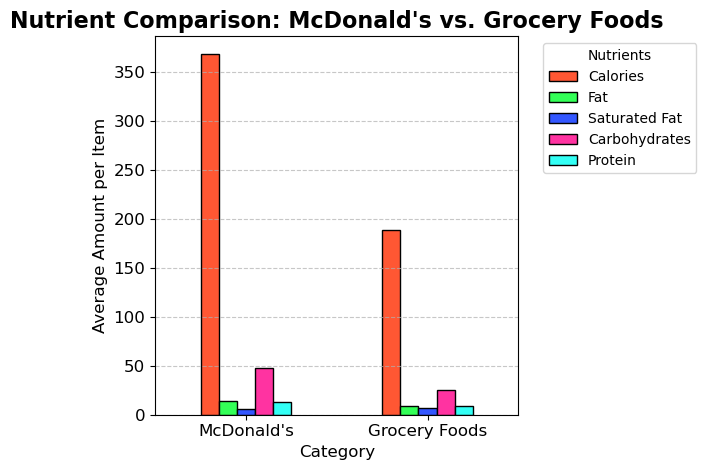

In [54]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    "Category": ["McDonald's", "Grocery Foods"],
    "Calories": [mcdonalds_avg["Calories"], common_foods_avg["Calories"]],
    "Fat": [mcdonalds_avg["Total Fat"], common_foods_avg["Fat"]],
    "Saturated Fat": [mcdonalds_avg["Saturated Fat"], common_foods_avg["Sat.Fat"]],
    "Carbohydrates": [mcdonalds_avg["Carbohydrates"], common_foods_avg["Carbs"]],
    "Protein": [mcdonalds_avg["Protein"], common_foods_avg["Protein"]]
})
plt.figure(figsize=(12, 6))
# Plot the bar chart
ax = comparison_df.set_index("Category").plot(kind="bar", color=["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#33FFF5"], edgecolor="black")
# Add gridlines
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the plot
plt.title("Nutrient Comparison: McDonald's vs. Grocery Foods", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Amount per Item", fontsize=12)
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title="Nutrients", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

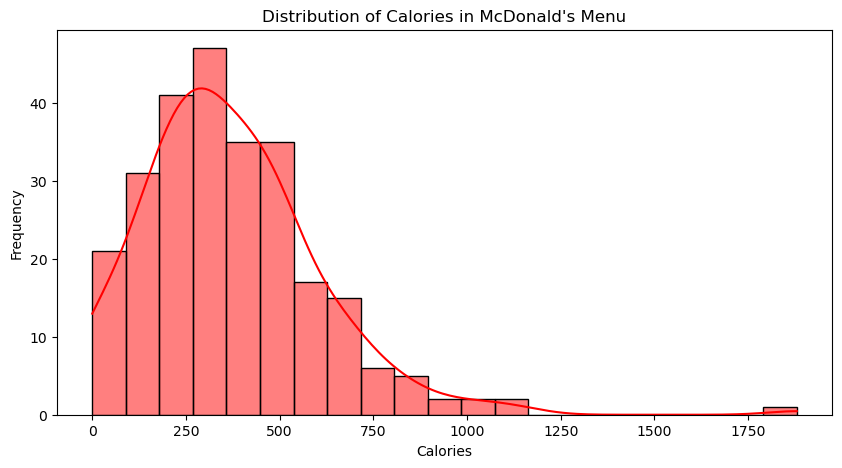

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(mcdonalds_data["Calories"], kde=True, color="red")
plt.title("Distribution of Calories in McDonald's Menu")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

Number of Protein-Rich Items in McDonald's: 42
Number of Protein-Rich Items in Common Foods: 48


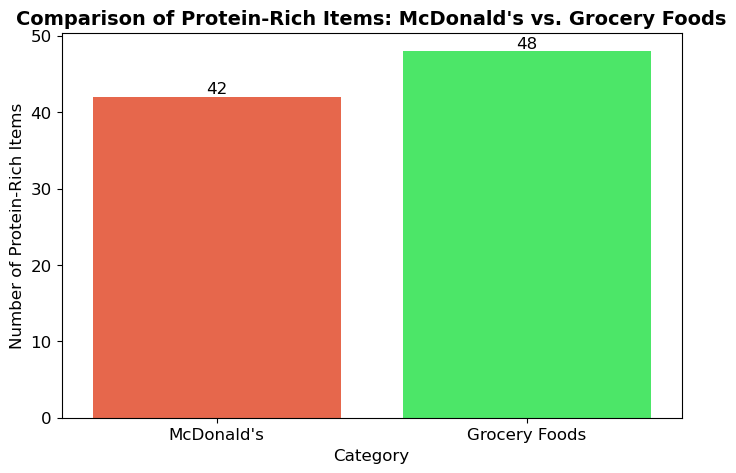

In [78]:
#protein-rich categories for McDonald's and Common Foods
mcdonalds_protein_categories = ["Beef & Pork", "Chicken & Fish", "Fish, Seafood"]
common_foods_protein_categories = ["Meat Poultry", "Fish Seafood"]

# couting protein items in McDonald's dataset
mcdonalds_protein_items = mcdonalds_data[mcdonalds_data["Category"].isin(mcdonalds_protein_categories)]
mcdonalds_protein_count = len(mcdonalds_protein_items)

# counting protein items in Common Foods dataset
common_foods_protein_items = common_foods_data[common_foods_data["Category"].isin(common_foods_protein_categories)]
common_foods_protein_count = len(common_foods_protein_items)

# Display the counts
print(f"Number of Protein-Rich Items in McDonald's: {mcdonalds_protein_count}")
print(f"Number of Protein-Rich Items in Common Foods: {common_foods_protein_count}")

# Create a comparison df
protein_comparison_df = pd.DataFrame({
    "Category": ["McDonald's", "Grocery Foods"],
    "Protein-Rich Items": [mcdonalds_protein_count, common_foods_protein_count]
})

#plot comparison
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Category", y="Protein-Rich Items", data=protein_comparison_df, hue="Category", palette=["#FF5733", "#33FF57"])

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",  # Display the value as an integer
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the label
        ha="center",  
        va="bottom",  
        fontsize=12,  
        color="black" 
    )

plt.title("Comparison of Protein-Rich Items: McDonald's vs. Grocery Foods", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Protein-Rich Items", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## What Have We Learned?
**Key Takeaways:**
- McDonald's meals **contain higher calories, fat, carbohydrates, and saturated fats** than grocery store foods.
- Even "healthier" McDonald's options **contain high sodium**.
- Grocery store foods **offer more balanced nutrients**.
- Grocery store foods **offer better and more high quality protein**.


## Impact Section

 **Real-World Implications**
- Educating people on **nutritional content** helps them make **better choices**.
- McDonald's **marketing healthier items** may be misleading.
- Future research could include **cost comparisons** (is eating healthy cheaper?).

**Potential Harm**
- This analysis does not account for **portion sizes**.
- Nutritional needs **vary per individual** (If you're on a bulk need higher calories).

**Basis**
- Overall even if you are cutting, bulking, or just trying to be healthy it is shown in medical history that **sodium is not healthy** and **high fats are not healthy**
- In my data, I have been able to present to you proof that you should **do your body a favor** and **stay away from McDonald's**, and all **fast foods**, switch to common grocery store items and your body will thank you. 

## References
- **McDonald's Nutrition Data:** https://www.kaggle.com/datasets/mcdonalds/nutrition-facts/data
- **Common Foods Nutrition Data:** https://www.kaggle.com/datasets/niharika41298/nutrition-details-for-most-common-foods
- **Matplotlib & Seaborn Documentation:** [https://matplotlib.org/](https://matplotlib.org/)